In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
df = pd.read_csv("../data/raw/Stock_data/Stocks/aapl.us.txt")
df

NameError: name 'pd' is not defined

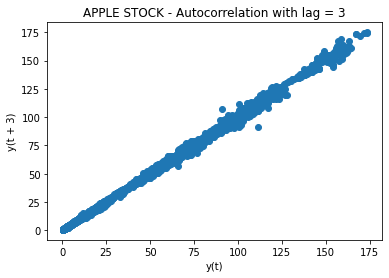

In [14]:
plt.figure()
lag_plot(df["Open"], lag=3)
plt.title("APPLE STOCK - Autocorrelation with lag = 3")
plt.show()

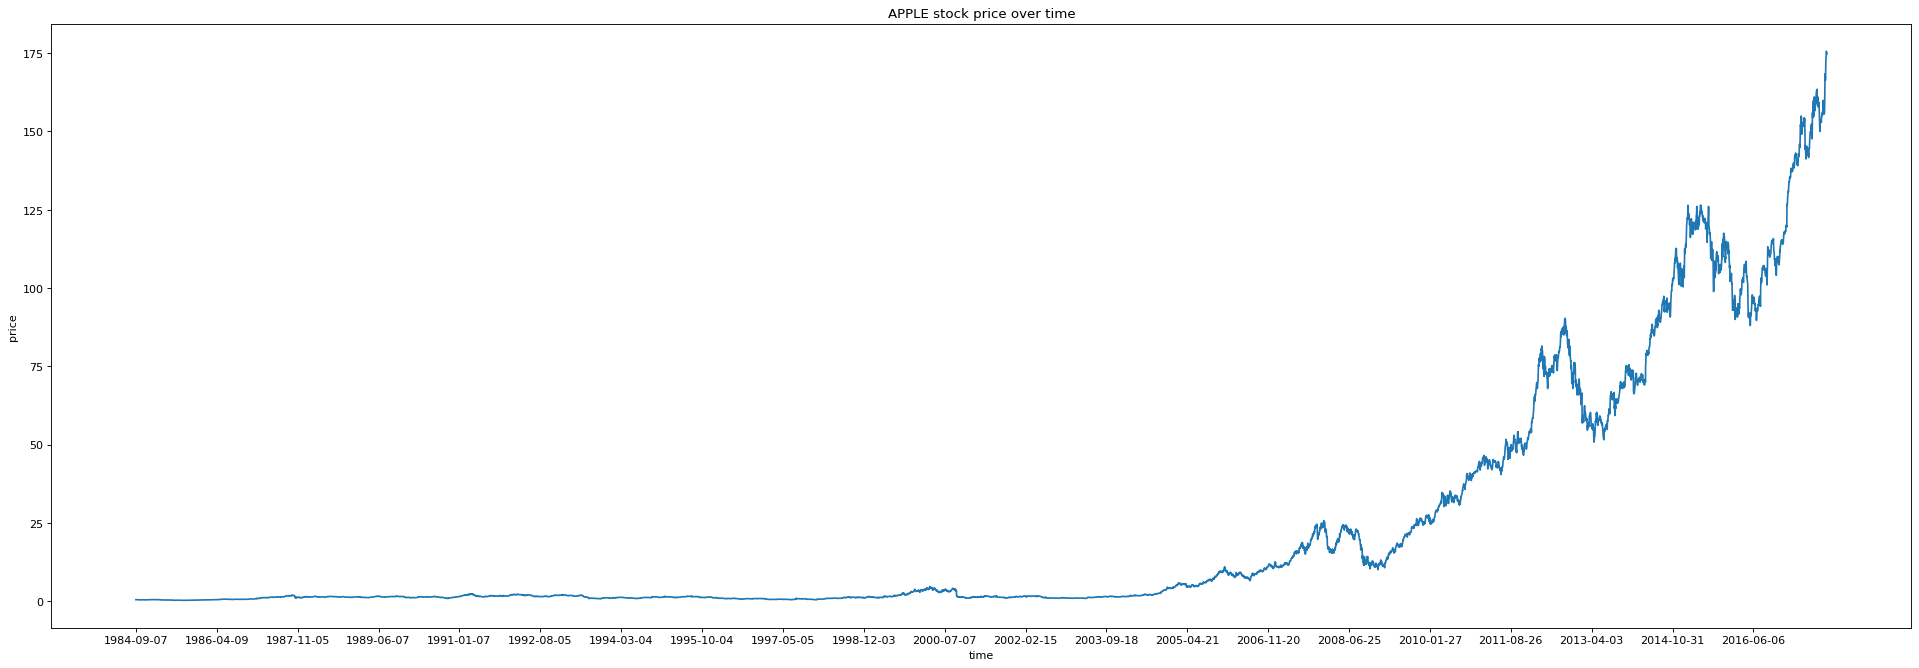

In [21]:

figure(figsize=(30, 10), dpi=80)

date_labels = []
for x in range(0,len(df["Date"]), 400):
    date_labels.append(df["Date"][x])


plt.xticks(np.arange(0,len(df["Date"]), step=400),date_labels )
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.plot(df["Date"], df["Close"])
plt.show()

In [22]:
#Build the arima models

#split the training data 70 : 30
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values


history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0)) #using model wiht p=4, d=1, q=0 
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

c:\Users\BrianBeinBrohan\projects\pytorch tutorials\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 1.3967167491884889


In [30]:
figure(figsize=(20, 20), dpi=580)
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Apple Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df["Date"]), step=400),date_labels )
plt.legend()
plt.show()